In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [2]:
with open("cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

         Date   Speaker timetype   time contents
0  2021-06-14  김태환 형 17       오전   6:01      고민중
1  2021-06-14    이현직 16       오전   8:00      셤잘쳐
2  2021-06-14  김태환 형 17       오전   8:00      귀여워
3  2021-06-14  김태환 형 17       오전  10:07       시발
4  2021-06-14  김태환 형 17       오전  10:08   담배가 쓰다
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      980 non-null    object
 1   Speaker   980 non-null    object
 2   timetype  980 non-null    object
 3   time      980 non-null    object
 4   contents  980 non-null    object
dtypes: object(5)
memory usage: 38.4+ KB
None


In [3]:
# Data Column을 pandas Datetime으로 변환.
data["Date"] = pd.to_datetime(data["Date"])
print(data["Date"])

# Date Column을 index로 설정.
data = data.set_index("Date")
data.head()

0     2021-06-14
1     2021-06-14
2     2021-06-14
3     2021-06-14
4     2021-06-14
         ...    
975   2021-06-30
976   2021-06-30
977   2021-06-30
978   2021-06-30
979   2021-06-30
Name: Date, Length: 980, dtype: datetime64[ns]


,Speaker,timetype,time,contents
Date,,,,
2021-06-14,김태환 형 17,오전,6:01,고민중
2021-06-14,이현직 16,오전,8:00,셤잘쳐
2021-06-14,김태환 형 17,오전,8:00,귀여워
2021-06-14,김태환 형 17,오전,10:07,시발
2021-06-14,김태환 형 17,오전,10:08,담배가 쓰다


In [4]:
# 10일대, 20일대, 30일대 별로 나누기
day10 = data["2021-06-10" : "2021-06-19"]
day20 = data["2021-06-20" : "2021-06-29"]
day30 = data["2021-06-30" : "2021-06-30"]

In [5]:
print(day10.head())
print(day20.head())
print(day30.head())

             Speaker timetype   time contents
Date                                         
2021-06-14  김태환 형 17       오전   6:01      고민중
2021-06-14    이현직 16       오전   8:00      셤잘쳐
2021-06-14  김태환 형 17       오전   8:00      귀여워
2021-06-14  김태환 형 17       오전  10:07       시발
2021-06-14  김태환 형 17       오전  10:08   담배가 쓰다
             Speaker timetype  time  \
Date                                  
2021-06-21  김태환 형 17       오후  2:53   
2021-06-21  김태환 형 17       오후  2:53   
2021-06-21  김표선 형 16       오후  3:06   
2021-06-21  김표선 형 16       오후  3:06   
2021-06-21  김태환 형 17       오후  3:12   

                                              contents  
Date                                                    
2021-06-21  위상 진짜 takehome 시험인데 30점만점에 평균이 어떻게 17점이나오지  
2021-06-21                     구글링도 허용인데 이걸 던지는 놈들이 있네  
2021-06-21                                       17점이면  
2021-06-21                                     잘나온거아니냐  
2021-06-21                     구글이랑 강의노트 보면 반 이상은 나오는데  
     

In [6]:
# 제대로 분리되었나 확인
print(day10.info())
print(day20.info())
print(day30.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 723 entries, 2021-06-14 to 2021-06-18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Speaker   723 non-null    object
 1   timetype  723 non-null    object
 2   time      723 non-null    object
 3   contents  723 non-null    object
dtypes: object(4)
memory usage: 28.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206 entries, 2021-06-21 to 2021-06-29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Speaker   206 non-null    object
 1   timetype  206 non-null    object
 2   time      206 non-null    object
 3   contents  206 non-null    object
dtypes: object(4)
memory usage: 8.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2021-06-30 to 2021-06-30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Spea

In [7]:
# 각 시간대별로 카카오톡 대화내용 가져오기
slice10 = [msg for msg in day10["contents"]]
slice20 = [msg for msg in day20["contents"]]
slice30 = [msg for msg in day30["contents"]]

In [8]:
# 데이터 확인
print(slice10[:10])
print(slice20[:10])
print(slice30[:10])

['고민중', '셤잘쳐', '귀여워', '시발', '담배가 쓰다', '왜', '담배가 더 쓰다', '락원아', '동현이가 저녁 먹으러 오래', '오키오키']
['위상 진짜 takehome 시험인데 30점만점에 평균이 어떻게 17점이나오지', '구글링도 허용인데 이걸 던지는 놈들이 있네', '17점이면', '잘나온거아니냐', '구글이랑 강의노트 보면 반 이상은 나오는데', '아  모기한테 엉덩이 물림', '프레드릭소렌드 썅년 꺼지라', '왜 취소함', '걍 들으셈', '개같은련이']
['고토 비쁠', '만족한다 ', ' 고토 비쁠은 잘한거지', '아  락 내가 어이스크림 함 살게', '동현이 빨리 까라', '벡해 비쁠', ' 오늘 사줘라', '이번주는 안됨', ' 집감', '풀약']


In [9]:
import nltk

total_tokens = [token for doc in slice10 for token in doc.split()]
print(len(total_tokens))

1810


In [10]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

1345
[('락원이', 22),
 ('난', 18),
 ('아', 17),
 ('진짜', 14),
 ('동현이', 12),
 ('근데', 11),
 ('니', 11),
 ('왜', 10),
 ('오늘', 10),
 ('내일', 9)]


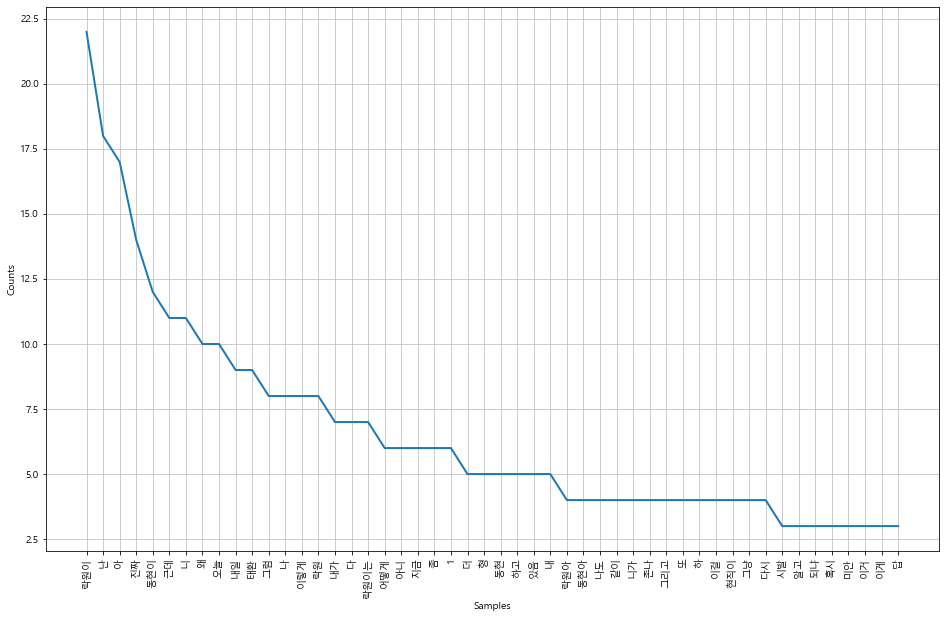

In [11]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

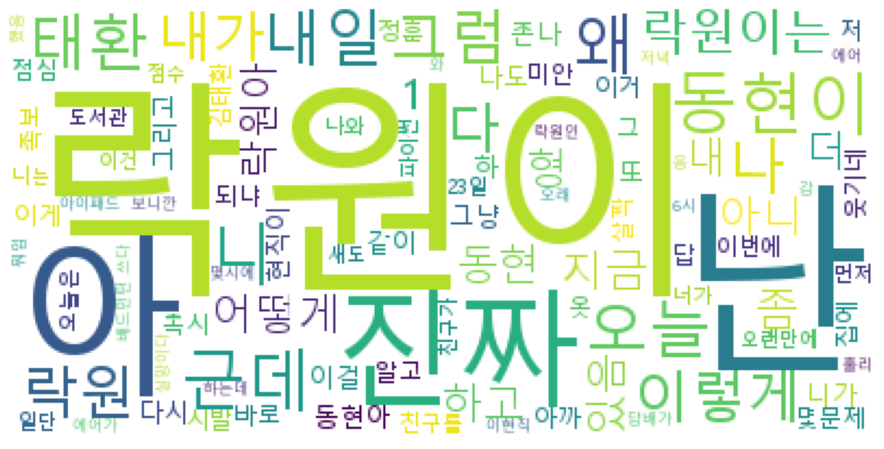

In [12]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
def time_freq_analysis(time_slice):
    
    total_tokens = [token for doc in time_slice for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

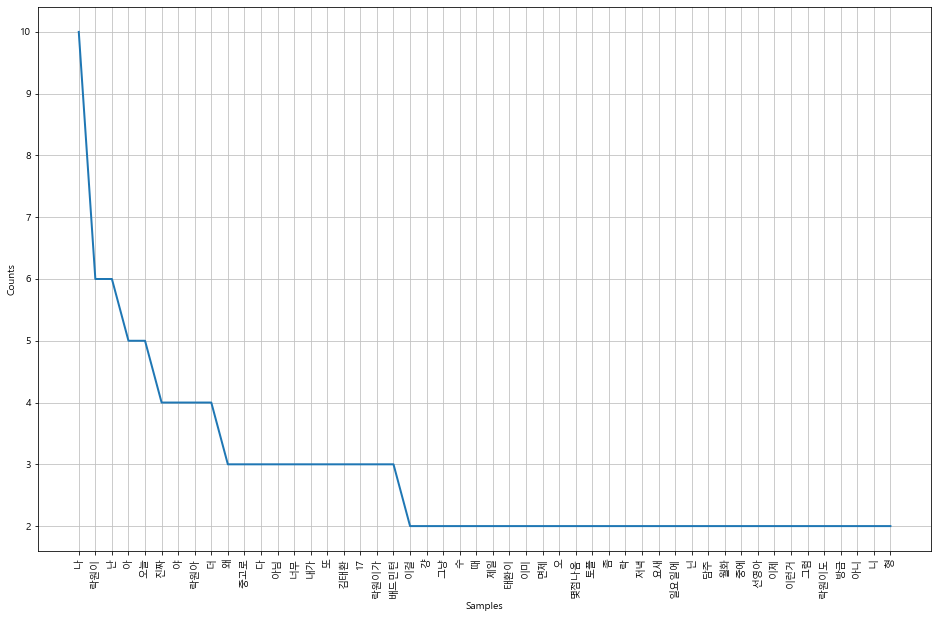

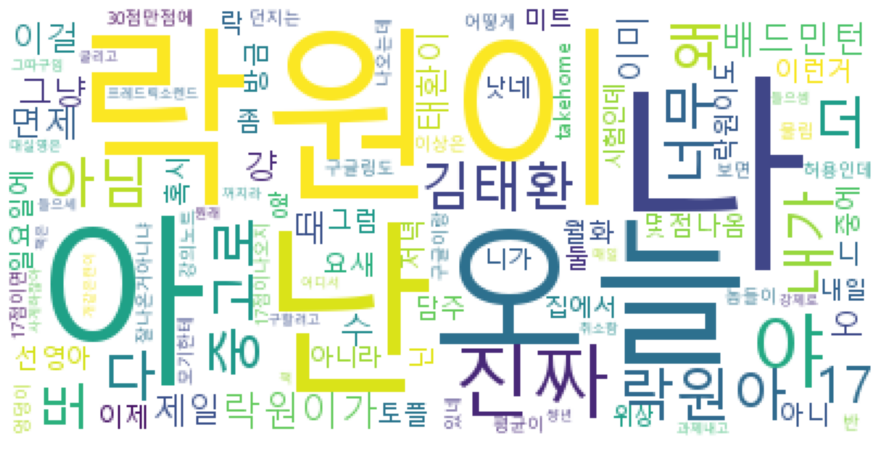

In [14]:
time_freq_analysis(slice20)

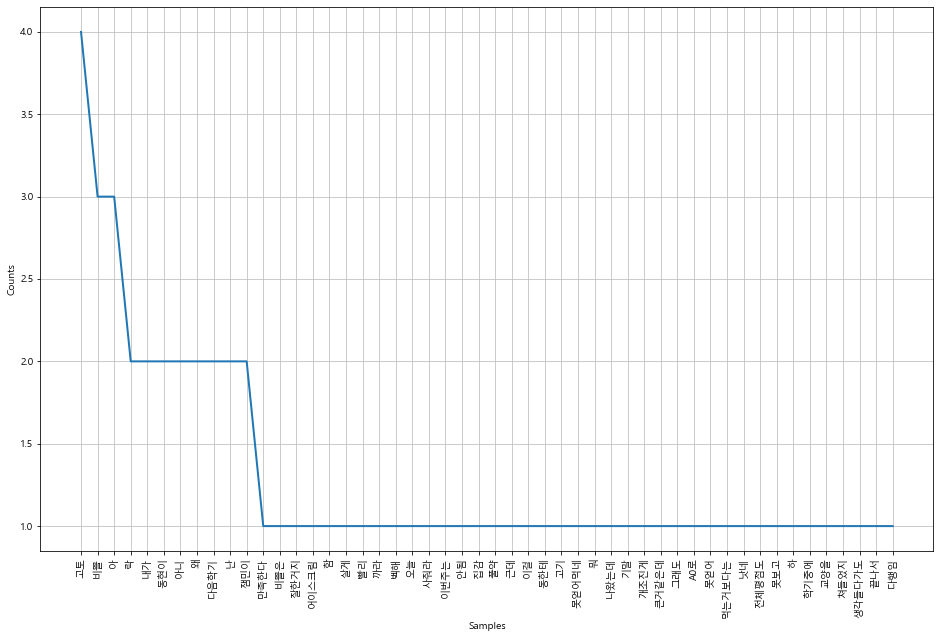

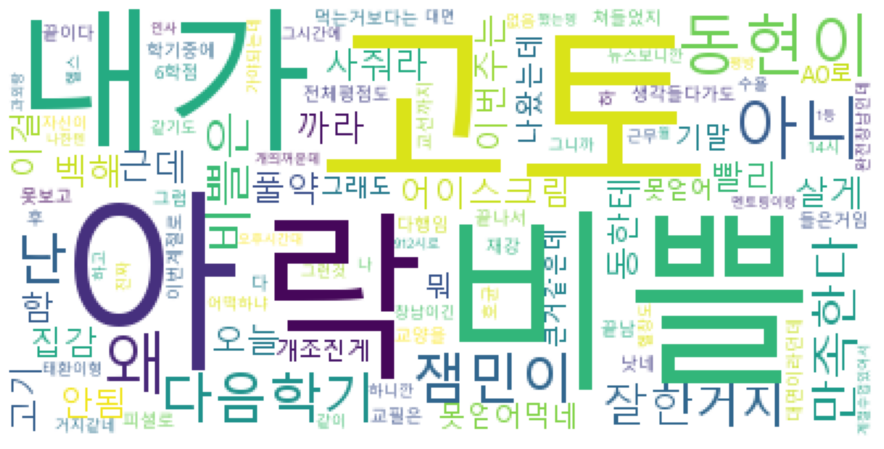

In [15]:
time_freq_analysis(slice30)